In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
from tensorflow.keras.applications import ResNet50
model = ResNet50(weights='imagenet')

102973440/102967424 [==============================] - 1s 0us/step


In [5]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [10]:
!wget https://solidstarts.com/wp-content/uploads/Lemon_edited-480x320.jpg

--2020-10-15 11:20:38--  https://solidstarts.com/wp-content/uploads/Lemon_edited-480x320.jpg
Resolving solidstarts.com (solidstarts.com)... 172.67.172.21, 104.24.118.202, 104.24.119.202, ...
Connecting to solidstarts.com (solidstarts.com)|172.67.172.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14047 (14K) [image/jpeg]
Saving to: ‘Lemon_edited-480x320.jpg.2’

Lemon_edited-480x32 100%[===================>]  13.72K  --.-KB/s    in 0s      

2020-10-15 11:20:38 (73.0 MB/s) - ‘Lemon_edited-480x320.jpg.2’ saved [14047/14047]



In [13]:
from tensorflow.keras.preprocessing.image import load_img
lemon_img = load_img('Lemon_edited-480x320.jpg', target_size=(224, 224))

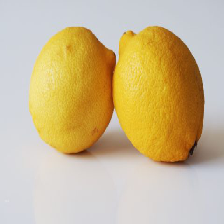

In [14]:
lemon_img

In [15]:
!wget https://cdn.britannica.com/33/103233-050-109A82AB/Tassagh-railway-viaduct-Keady-Armagh.jpg

--2020-10-15 11:23:03--  https://cdn.britannica.com/33/103233-050-109A82AB/Tassagh-railway-viaduct-Keady-Armagh.jpg
Resolving cdn.britannica.com (cdn.britannica.com)... 99.84.251.59, 99.84.251.51, 99.84.251.47, ...
Connecting to cdn.britannica.com (cdn.britannica.com)|99.84.251.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 734591 (717K) [image/jpeg]
Saving to: ‘Tassagh-railway-viaduct-Keady-Armagh.jpg’

Tassagh-railway-via 100%[===================>] 717.37K  --.-KB/s    in 0.05s   

2020-10-15 11:23:03 (14.0 MB/s) - ‘Tassagh-railway-viaduct-Keady-Armagh.jpg’ saved [734591/734591]



In [22]:
!wget https://imgs.6sqft.com/wp-content/uploads/2017/07/11155700/29566422173_9699eac4a1_o-e1499872344739.jpg

--2020-10-15 11:32:21--  https://imgs.6sqft.com/wp-content/uploads/2017/07/11155700/29566422173_9699eac4a1_o-e1499872344739.jpg
Resolving imgs.6sqft.com (imgs.6sqft.com)... 172.67.68.41, 104.26.15.70, 104.26.14.70, ...
Connecting to imgs.6sqft.com (imgs.6sqft.com)|172.67.68.41|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9956819 (9.5M) [image/jpeg]
Saving to: ‘29566422173_9699eac4a1_o-e1499872344739.jpg’

29566422173_9699eac 100%[===================>]   9.50M  --.-KB/s    in 0.1s    

2020-10-15 11:32:22 (78.9 MB/s) - ‘29566422173_9699eac4a1_o-e1499872344739.jpg’ saved [9956819/9956819]



In [23]:
viaduct_img = load_img('Tassagh-railway-viaduct-Keady-Armagh.jpg', target_size=(224, 224))
water_tower_img = load_img('29566422173_9699eac4a1_o-e1499872344739.jpg', target_size=(224, 224))

In [18]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import pandas as pd

def get_top_5_predictions(img):
    x = img_to_array(img)[np.newaxis, ...]
    x = preprocess_input(x)
    preds = decode_predictions(model.predict(x), top=5)
    top_preds = pd.DataFrame(columns=['prediction', 'probability'],
                             index=np.arange(5)+1)
    for i in range(5):
        top_preds.loc[i+1, 'prediction'] = preds[0][i][1]
        top_preds.loc[i+1, 'probability'] = preds[0][i][2] 
    return top_preds

In [19]:
get_top_5_predictions(lemon_img)

40960/35363 [==================================] - 0s 0us/step


,prediction,probability
1,lemon,0.981745
2,orange,0.0137354
3,jackfruit,0.00144576
4,pineapple,0.000681317
5,banana,0.000381614


In [20]:
get_top_5_predictions(viaduct_img)

,prediction,probability
1,viaduct,0.998889
2,monastery,0.000350504
3,steel_arch_bridge,0.000279622
4,pier,0.000151745
5,dam,4.60899e-05


In [24]:
get_top_5_predictions(water_tower_img)

,prediction,probability
1,water_tower,0.98088
2,castle,0.0156946
3,fountain,0.000950433
4,palace,0.000648376
5,jigsaw_puzzle,0.000602841


**Tensorflow Hub**

In [34]:
import tensorflow_hub as hub
from tensorflow.keras.models import load_model
from tensorflow.keras import Sequential

In [35]:
module_url = "https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4"
model = Sequential([hub.KerasLayer(module_url)])
model.build(input_shape=[None, 160, 160, 3])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              1343049   
Total params: 1,343,049
Trainable params: 0
Non-trainable params: 1,343,049
_________________________________________________________________


In [37]:
from tensorflow.keras.preprocessing.image import load_img
lemon_img = load_img('Lemon_edited-480x320.jpg', target_size=(160, 160))
viaduct_img = load_img('Tassagh-railway-viaduct-Keady-Armagh.jpg', target_size=(160, 160))
water_tower_img = load_img('29566422173_9699eac4a1_o-e1499872344739.jpg', target_size=(160, 160))


In [38]:
!wget https://gist.githubusercontent.com/ageitgey/4e1342c10a71981d0b491e1b8227328b/raw/24d78ea09a31fdff540a8494886e0051e3ad68f8/imagenet_classes.txt

--2020-10-15 13:22:45--  https://gist.githubusercontent.com/ageitgey/4e1342c10a71981d0b491e1b8227328b/raw/24d78ea09a31fdff540a8494886e0051e3ad68f8/imagenet_classes.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15543 (15K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  15.18K  --.-KB/s    in 0.01s   

2020-10-15 13:22:46 (1.48 MB/s) - ‘imagenet_classes.txt’ saved [15543/15543]



In [41]:
with open('imagenet_classes.txt') as txt_file:
    categories = txt_file.read().splitlines()

In [42]:
import pandas as pd
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

def get_top_5_predictions(img):
    x = img_to_array(img)[np.newaxis, ...] / 255.0
    preds = model.predict(x)
    top_preds = pd.DataFrame(columns=['prediction'],
                             index=np.arange(5)+1)
    sorted_index = np.argsort(-preds[0])
    for i in range(5):
        ith_pred = categories[sorted_index[i]]
        top_preds.loc[i+1, 'prediction'] = ith_pred
            
    return top_preds

In [43]:
get_top_5_predictions(lemon_img)

,prediction
1,"948, Granny_Smith"
2,"947, mushroom"
3,"849, teapot"
4,"937, broccoli"
5,"951, lemon"


In [44]:
get_top_5_predictions(viaduct_img)

,prediction
1,"885, velvet"
2,"818, spotlight"
3,"660, mobile_home"
4,"646, maze"
5,"715, pickelhaube"


In [45]:
get_top_5_predictions(water_tower_img)

,prediction
1,"480, cash_machine"
2,"897, washer"
3,"855, thimble"
4,"439, bearskin"
5,"494, chime"
